In [1]:
non_native = {
    'i': [[276, 2291, 2990], [356, 2198, 3163], [290, 1972, 3029]],
    'e': [[405, 2142, 2889], [532, 2008, 2910], [388, 1836, 2743], [374, 2129, 2967], [386, 1893, 2742], [374, 2129, 2967], [386, 1893, 2742]],
    'ɛ': [[552, 1969, 2735], [480, 1910, 2733], [559, 1907, 2658], [417, 1701, 2601]],
    'y': [[312, 1986, 2946], [311, 2161, 2726], [284, 1978, 3054]],
    'ø': [[480, 2065, 2600], [514, 1672, 2817], [389, 1616, 2780], [457, 1991, 2739], [532, 2002, 2763], [371, 1661, 2625]],
    'œ': [[496, 1917, 2584], [608, 1847, 2856], [450, 1438, 2500]],
    'u': [[380, 1994, 2977], [322, 1545, 2467], [282, 1679, 2703]],
    'o': [[547, 1347, 2810], [518, 1185, 2775], [392, 1151, 2822]],
    'ɔ': [[615, 1540, 2865], [507, 1121, 2820], [515, 1250, 2542]],
    'a': [[790, 1576, 2740], [861, 1513, 2667], [506, 1252, 2547], [723, 1582, 2611], [861, 1477, 2730], [578, 1333, 2559]]
}

native = {
    'i': [[301, 2080, 3239], [218, 1942, 3117], [411, 2221, 3182], [275, 1866, 3083], [316, 2190, 3251]],
    'e': [[360, 2053, 2749], [326, 1892, 2851], [450, 2295, 3064], [360, 1886, 2764], [377, 2002, 2693], [398, 2204, 3000], [364, 1862, 2703], [482, 1941, 2684]],
    'ɛ': [[469, 1864, 2544], [453, 1612, 2386], [497, 1903, 2653], [430, 1673, 2681], [532, 2092, 2967], [508, 1690, 2685], [498, 1707, 2712]],
    'y': [[296, 1968, 2415], [253, 1823, 2581], [302, 2116, 2953], [284, 1823, 2998], [355, 2129, 3008]],
    'ø': [[355, 1610, 2488], [349, 1478, 2330], [501, 1706, 2525], [354, 1459, 2866], [362, 1583, 2615], [347, 1647, 2482], [359, 1691, 2537], [407, 1742, 2834], [343, 1488, 2962], [385, 1610, 2639]],
    'œ': [[467, 1600, 2507], [428, 1489, 2506], [564, 1671, 2842], [482, 1390, 2549], [515, 1405, 2728]],
    'u': [[350, 1661, 2892], [279, 2017, 3314], [369, 1220, 2747], [366, 1441, 3118], [499, 1737, 2767]],
    'o': [[357, 1172, 2600], [372, 1821, 3106], [384, 1115, 2748], [392, 1014, 2916], [435, 1400, 2602]],
    'ɔ': [[505, 1073, 2781], [486, 1035, 2437], [595, 1315, 2930], [549, 1080, 2627], [540, 1132, 2420]],
    'a': [[605, 1217, 2564], [520, 1197, 2652], [820, 1556, 2882], [665, 1271, 2585], [606, 1223, 2545], [603, 1531, 2526], [501, 1337, 2580], [842, 1687, 2521], [609, 1347, 2759], [620, 1404, 2536]]
}

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.stats import ttest_ind
import scipy.stats as st
import spm1d

colors = dict(zip(native.keys(), cm.rainbow(np.linspace(0, 1, len(native)))))
colors = dict(zip(native.keys(), ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']))

def brighter(color, amount=0.5):
    r, g, b, a = color
    return np.array([1-((1-r)*amount), 1-((1-g)*amount), 1-((1-b)*amount), a])

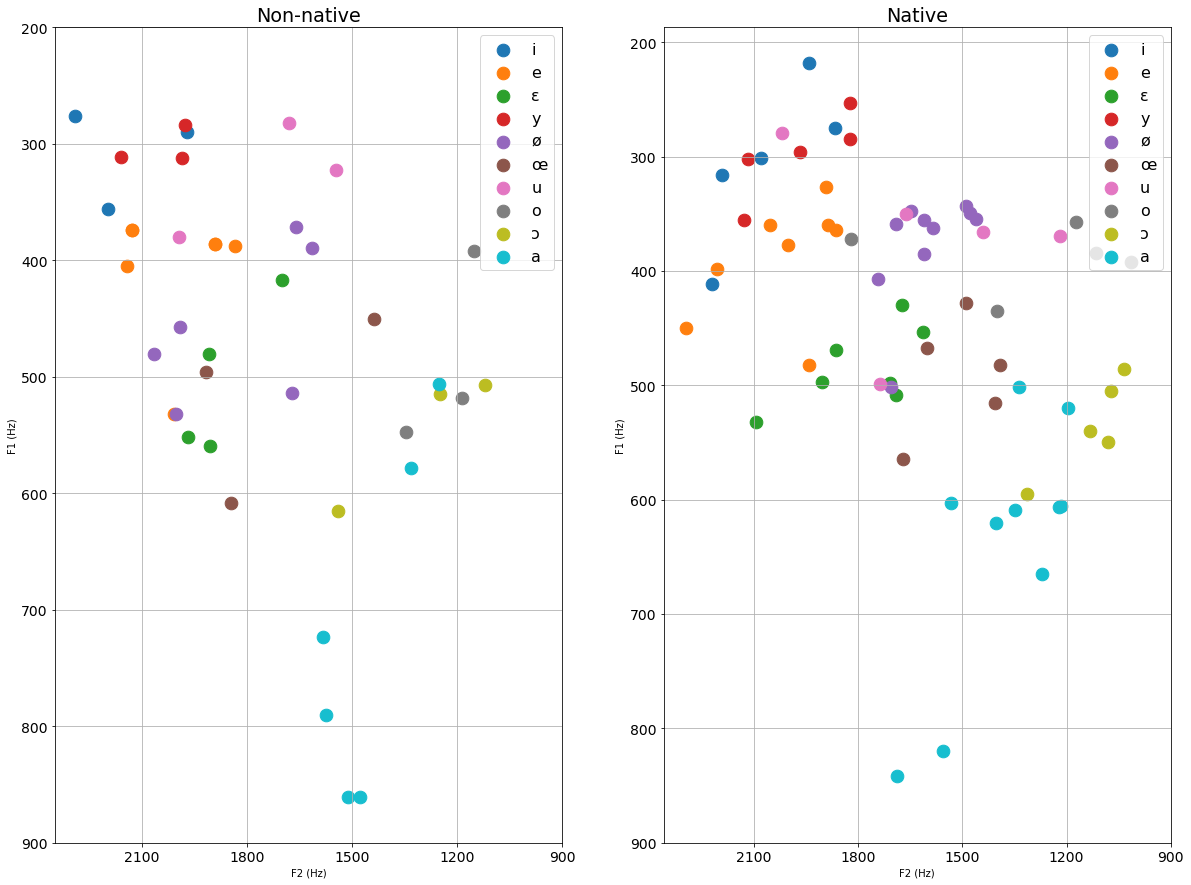

In [3]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
for ax, data in zip([ax1, ax2], [non_native, native]):
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f1s, cur_f2s, label in zip(f1s, f2s, labels):
        ax.scatter(cur_f2s, cur_f1s, s=160, label=label, color=colors[label])
    ax.set_xticks(np.linspace(900, 2100, 5))
    ax.set_yticks(np.linspace(200, 900, 8))
    ax.set_xlabel('F2 (Hz)')
    ax.set_ylabel('F1 (Hz)')
    ax.set_title('Non-native' if data == non_native else 'Native')
    ax.grid(True)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right")
plt.savefig('both_f1f2.png')

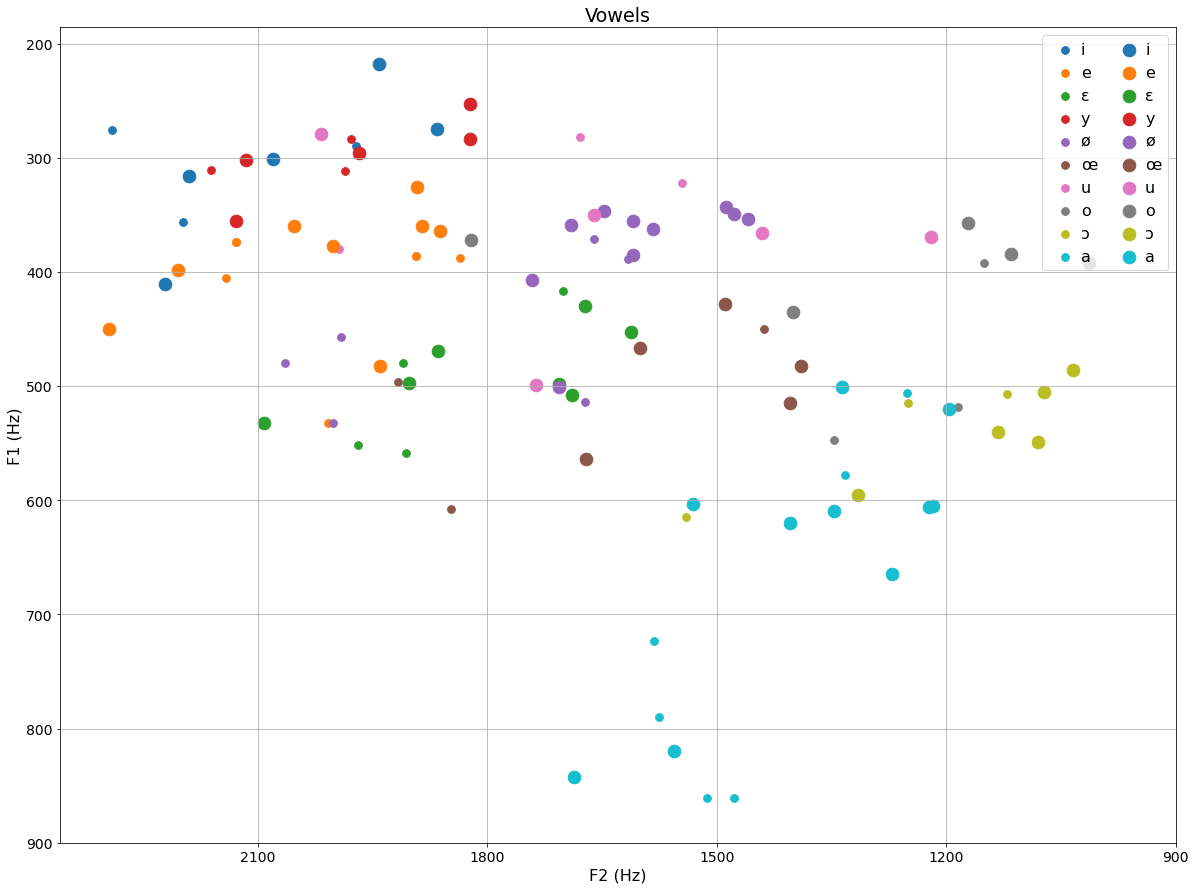

In [4]:
fig, ((ax)) = plt.subplots(1, 1, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
ax.invert_xaxis()
ax.invert_yaxis()
for data in [non_native, native]:
    isnat = data == native
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f1s, cur_f2s, label in zip(f1s, f2s, labels):
        ax.scatter(cur_f2s, cur_f1s, s=160 if isnat else 60, label=label, color=colors[label])
    ax.set_xticks(np.linspace(900, 2100, 5))
    ax.set_yticks(np.linspace(200, 900, 8))
    ax.set_xlabel('F2 (Hz)')
    ax.set_ylabel('F1 (Hz)')
    ax.set_title('Non-native' if not isnat else 'Vowels')
    ax.grid(True)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right", ncol=2, handletextpad=0, columnspacing=1)
plt.savefig('all_f1f2.png')

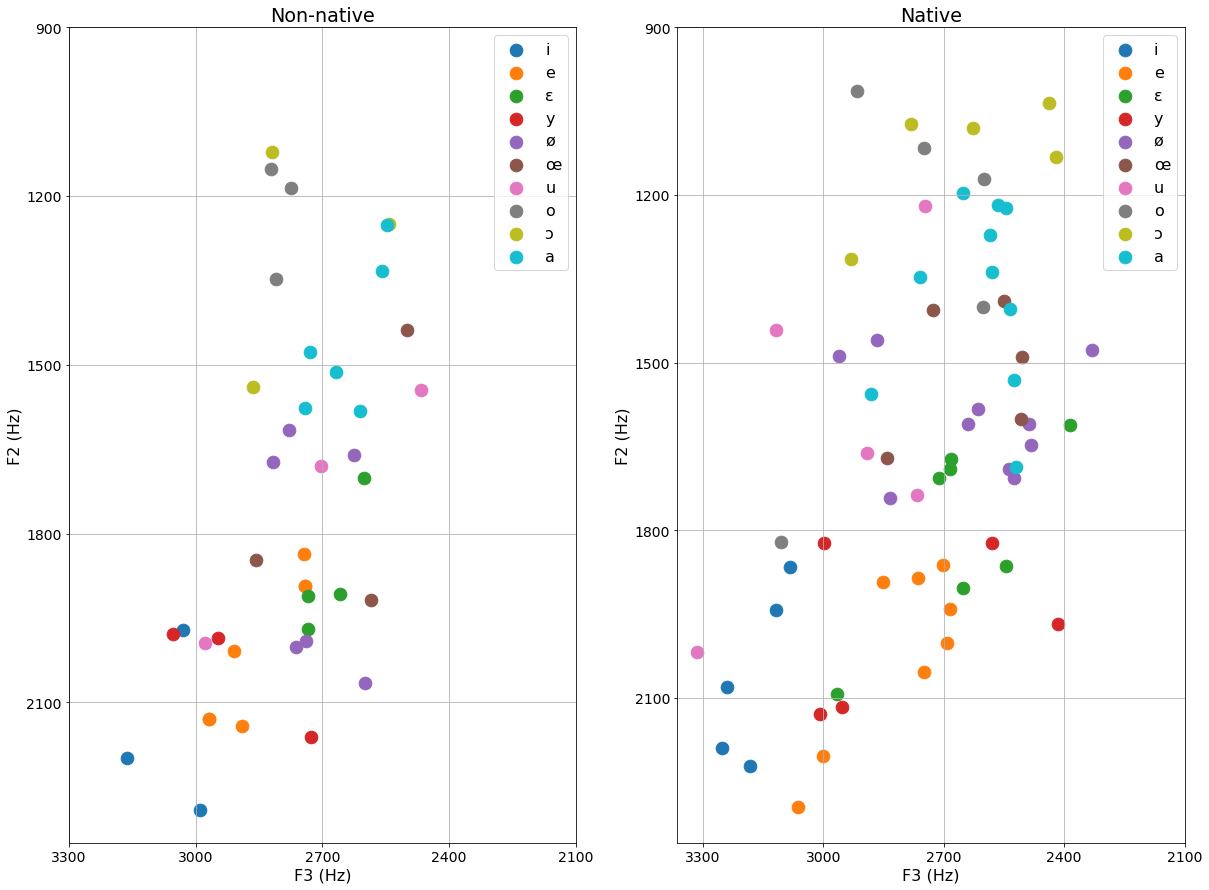

In [12]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
for ax, data in zip([ax1, ax2], [non_native, native]):
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f2s, cur_f3s, label in zip(f2s, f3s, labels):
        ax.scatter(cur_f3s, cur_f2s, s=160, label=label, color=colors[label])
    ax.set_xticks(np.linspace(2100, 3300, 5))
    ax.set_yticks(np.linspace(900, 2100, 5))
    ax.set_xlabel('F3 (Hz)')
    ax.set_ylabel('F2 (Hz)')
    ax.set_title('Non-native' if data == non_native else 'Native')
    ax.grid(True)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right")
plt.savefig('both_f2f3.png')

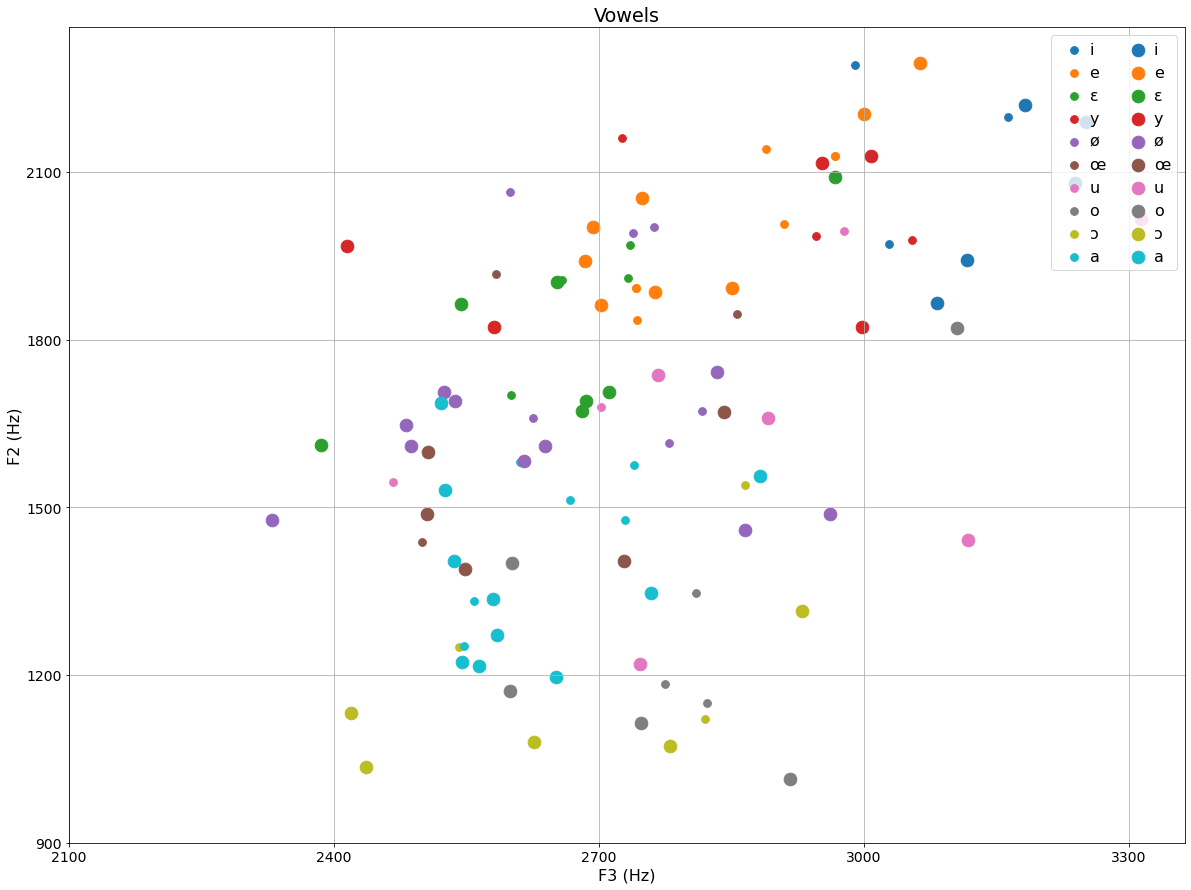

In [6]:
ax.invert_xaxis()
ax.invert_yaxis()

fig, ((ax)) = plt.subplots(1, 1, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
for data in [non_native, native]:
    isnat = data == native
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f2s, cur_f3s, label in zip(f2s, f3s, labels):
        ax.scatter(cur_f3s, cur_f2s, s=160 if isnat else 60, label=label, color=colors[label])
    ax.set_xticks(np.linspace(2100, 3300, 5))
    ax.set_yticks(np.linspace(900, 2100, 5))
    ax.set_xlabel('F3 (Hz)')
    ax.set_ylabel('F2 (Hz)')
    ax.set_title('Vowels')
    ax.grid(True)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right", ncol=2, handletextpad=0, columnspacing=1)
plt.savefig('all_f2f3.png')

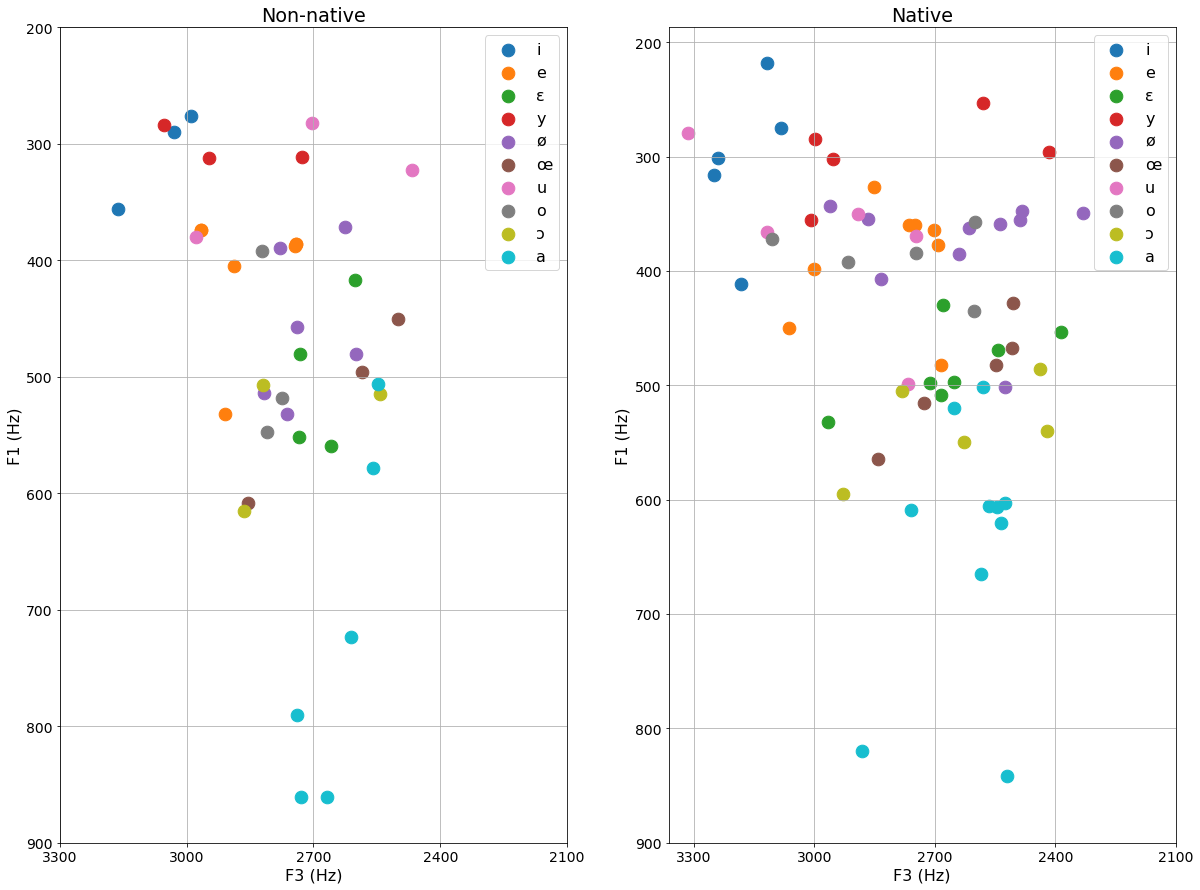

In [7]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
for ax, data in zip([ax1, ax2], [non_native, native]):
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f1s, cur_f3s, label in zip(f1s, f3s, labels):
        ax.scatter(cur_f3s, cur_f1s, s=160, label=label, color=colors[label])
    ax.set_xticks(np.linspace(2100, 3300, 5))
    ax.set_yticks(np.linspace(200, 900, 8))
    ax.set_xlabel('F3 (Hz)')
    ax.set_ylabel('F1 (Hz)')
    ax.set_title('Non-native' if data == non_native else 'Native')
    ax.grid(True)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right")
plt.savefig('both_f1f3.png')

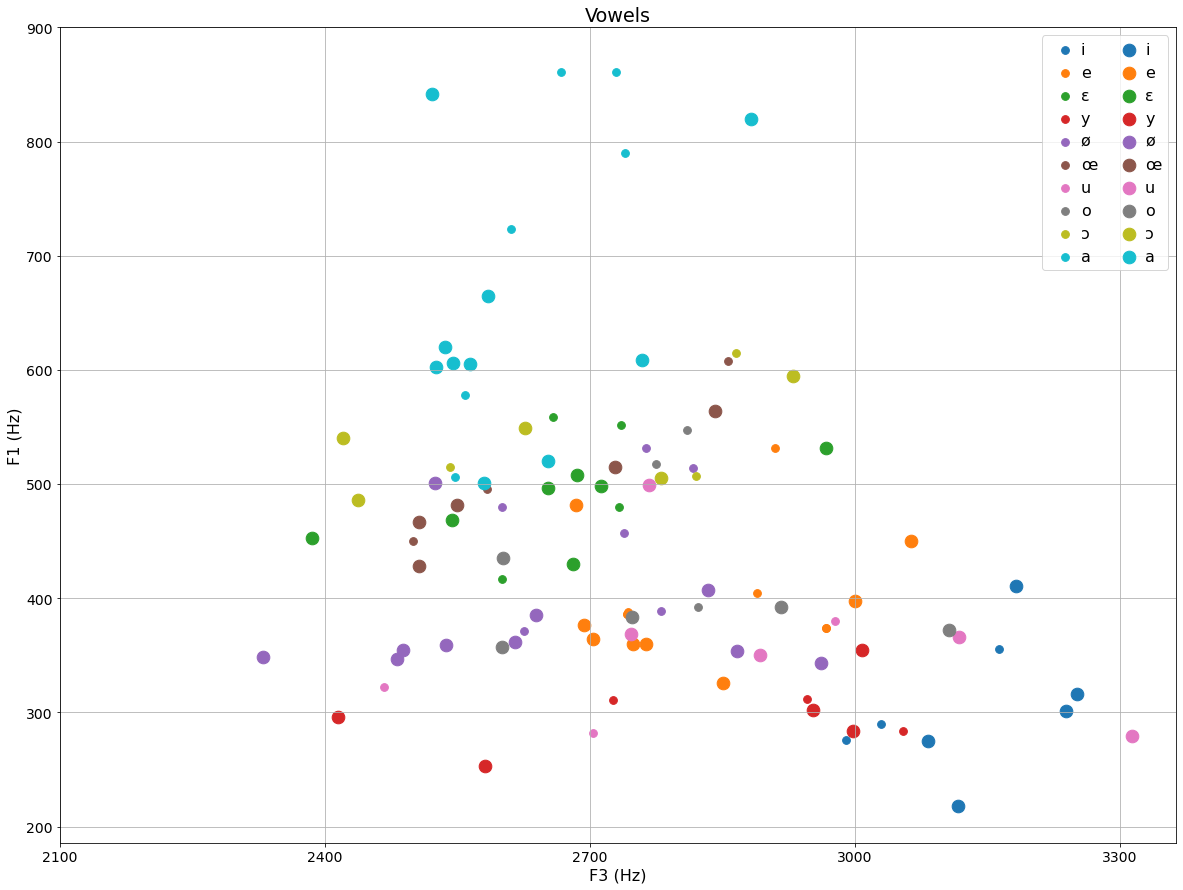

In [8]:
ax.invert_xaxis()
ax.invert_yaxis()

fig, ((ax)) = plt.subplots(1, 1, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
for data in [non_native, native]:
    isnat = data == native
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f1s, cur_f3s, label in zip(f1s, f3s, labels):
        ax.scatter(cur_f3s, cur_f1s, s=160 if isnat else 60, label=label, color=colors[label])
    ax.set_xticks(np.linspace(2100, 3300, 5))
    ax.set_yticks(np.linspace(200, 900, 8))
    ax.set_xlabel('F3 (Hz)')
    ax.set_ylabel('F1 (Hz)')
    ax.set_title('Vowels')
    ax.grid(True)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right", ncol=2, handletextpad=0, columnspacing=1)
plt.savefig('all_f1f3.png')

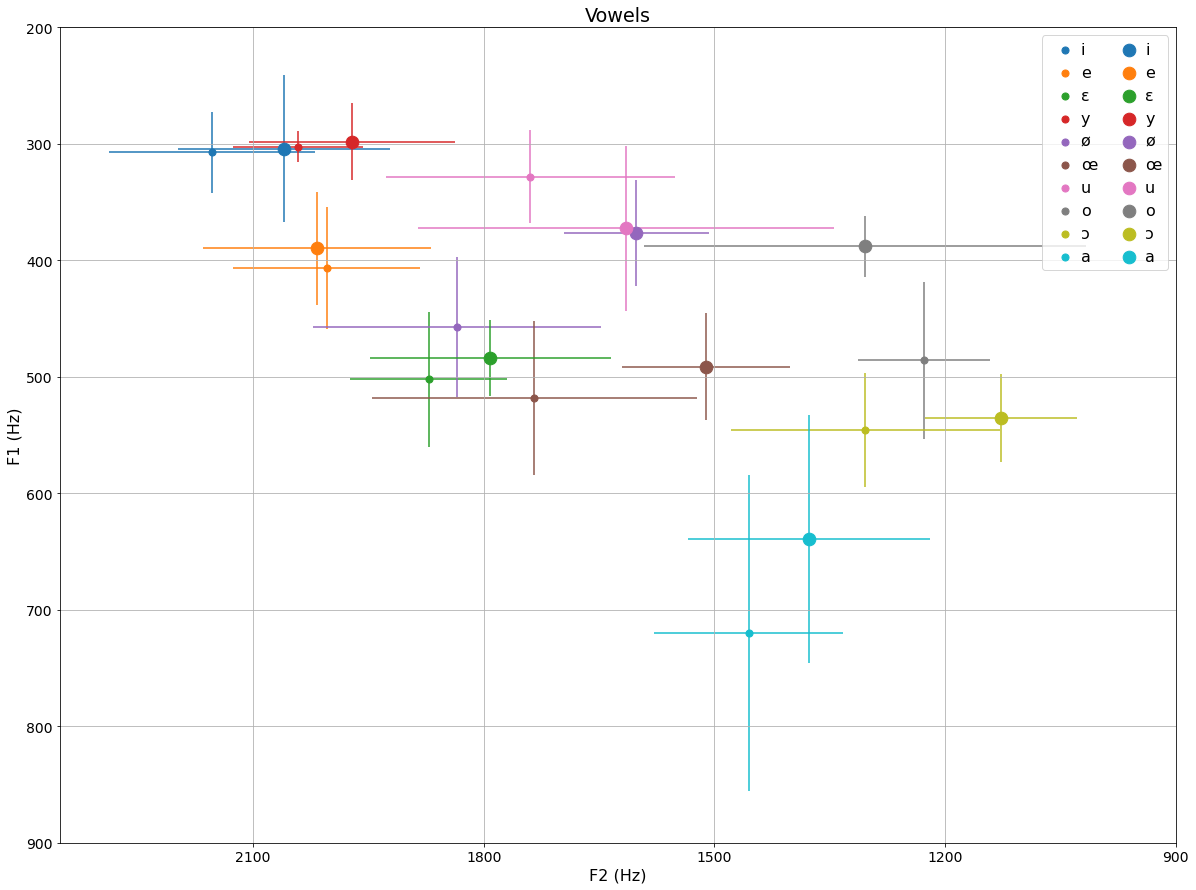

In [9]:
fig, ((ax)) = plt.subplots(1, 1, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
ax.invert_xaxis()
ax.invert_yaxis()
for data in [non_native, native]:
    isnat = data == native
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f1s, cur_f2s, label in zip(f1s, f2s, labels):
        mean_f1 = [np.mean(cur_f1s)]
        mean_f2 = [np.mean(cur_f2s)]
        stddev_f1 = [np.std(cur_f1s)]
        stddev_f2 = [np.std(cur_f2s)]
        ax.errorbar(mean_f2, mean_f1, color=colors[label], xerr=[stddev_f2], yerr=[stddev_f1], zorder=1)
        ax.scatter(mean_f2, mean_f1, s=160 if isnat else 50, label=label, color=colors[label], zorder=2)
    ax.set_xticks(np.linspace(900, 2100, 5))
    ax.set_yticks(np.linspace(200, 900, 8))
    ax.set_xlabel('F2 (Hz)')
    ax.set_ylabel('F1 (Hz)')
    ax.set_title('Non-native' if not isnat else 'Vowels')
    ax.grid(True)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right", ncol=2, handletextpad=0, columnspacing=1)
plt.savefig('all_bars_f1f2.png')

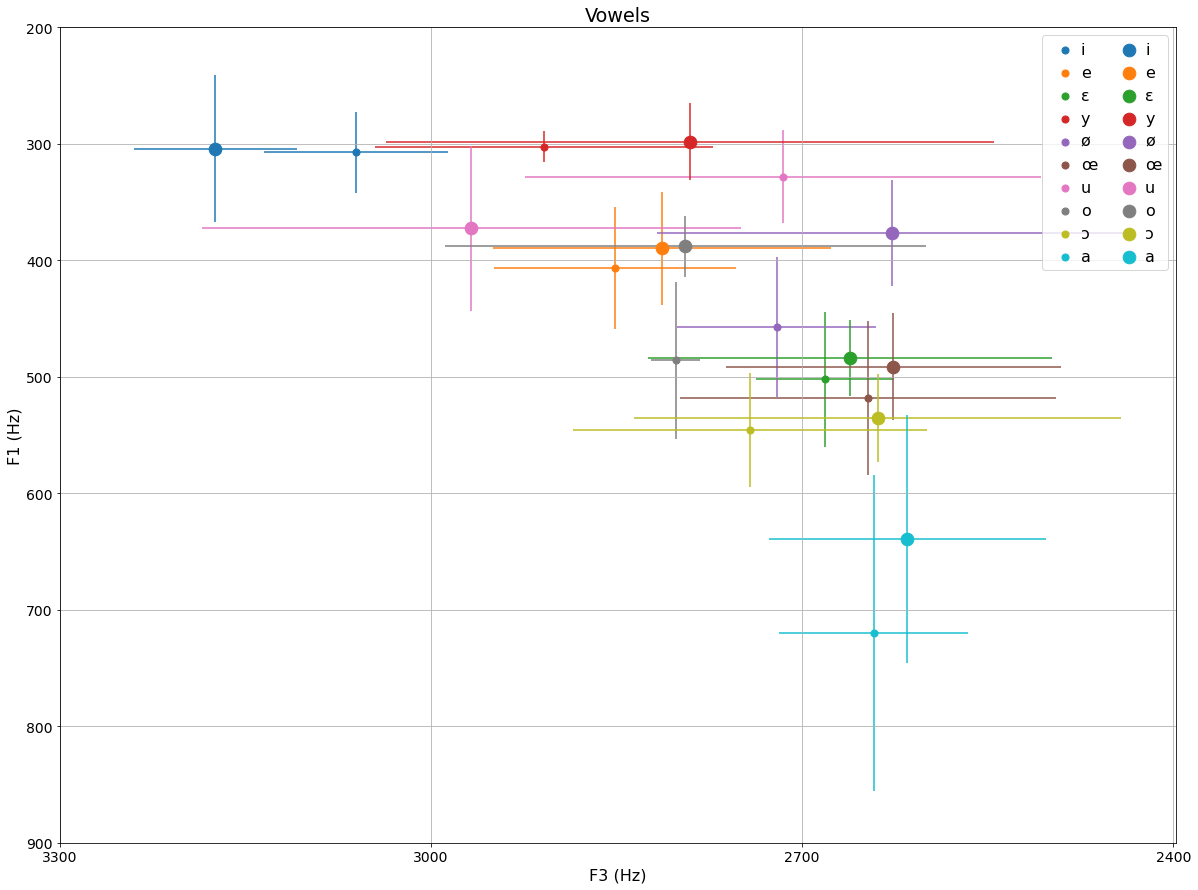

In [14]:
fig, ((ax)) = plt.subplots(1, 1, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
ax.invert_xaxis()
ax.invert_yaxis()
for data in [non_native, native]:
    isnat = data == native
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f1s, cur_f3s, label in zip(f1s, f3s, labels):
        mean_f1 = [np.mean(cur_f1s)]
        mean_f3 = [np.mean(cur_f3s)]
        stddev_f1 = [np.std(cur_f1s)]
        stddev_f3 = [np.std(cur_f3s)]
        ax.errorbar(mean_f3, mean_f1, color=colors[label], xerr=[stddev_f3], yerr=[stddev_f1], zorder=1)
        ax.scatter(mean_f3, mean_f1, s=160 if isnat else 50, label=label, color=colors[label], zorder=2)
    ax.set_xticks(np.linspace(2400, 3300, 4))
    ax.set_yticks(np.linspace(200, 900, 8))
    ax.set_xlabel('F3 (Hz)')
    ax.set_ylabel('F1 (Hz)')
    ax.set_title('Non-native' if not isnat else 'Vowels')
    ax.grid(True)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right", ncol=2, handletextpad=0, columnspacing=1)
plt.savefig('all_bars_f1f3.png')

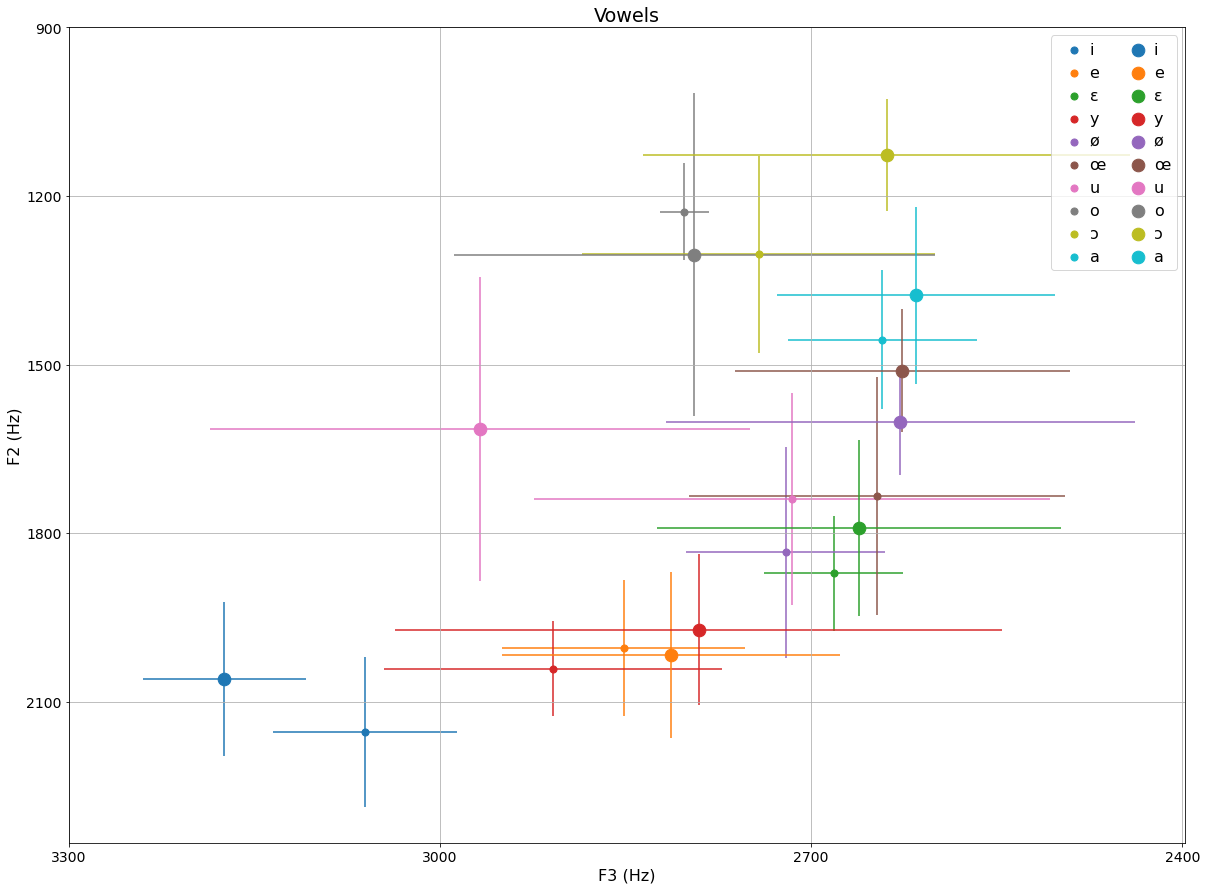

In [15]:
fig, ((ax)) = plt.subplots(1, 1, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
ax.invert_xaxis()
ax.invert_yaxis()
for data in [non_native, native]:
    isnat = data == native
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f2s, cur_f3s, label in zip(f2s, f3s, labels):
        mean_f2 = [np.mean(cur_f2s)]
        mean_f3 = [np.mean(cur_f3s)]
        stddev_f2 = [np.std(cur_f2s)]
        stddev_f3 = [np.std(cur_f3s)]
        ax.errorbar(mean_f3, mean_f2, color=colors[label], xerr=[stddev_f3], yerr=[stddev_f2], zorder=1)
        ax.scatter(mean_f3, mean_f2, s=160 if isnat else 50, label=label, color=colors[label], zorder=2)
    ax.set_xticks(np.linspace(2400, 3300, 4))
    ax.set_yticks(np.linspace(900, 2100, 5))
    ax.set_xlabel('F3 (Hz)')
    ax.set_ylabel('F2 (Hz)')
    ax.set_title('Non-native' if not isnat else 'Vowels')
    ax.grid(True)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right", ncol=2, handletextpad=0, columnspacing=1)
plt.savefig('all_bars_f2f3.png')

In [15]:
for key in native.keys():
    print(key, f'{1-st.norm.cdf(spm1d.stats.hotellings2(np.array(native[key]), np.array(non_native[key])).z):.5f}')

i 0.00000
e 0.00717
ɛ 0.17131
y 0.05767
ø 0.00000
œ 0.00001
u 0.00000
o 0.00000
ɔ 0.00000
a 0.06120


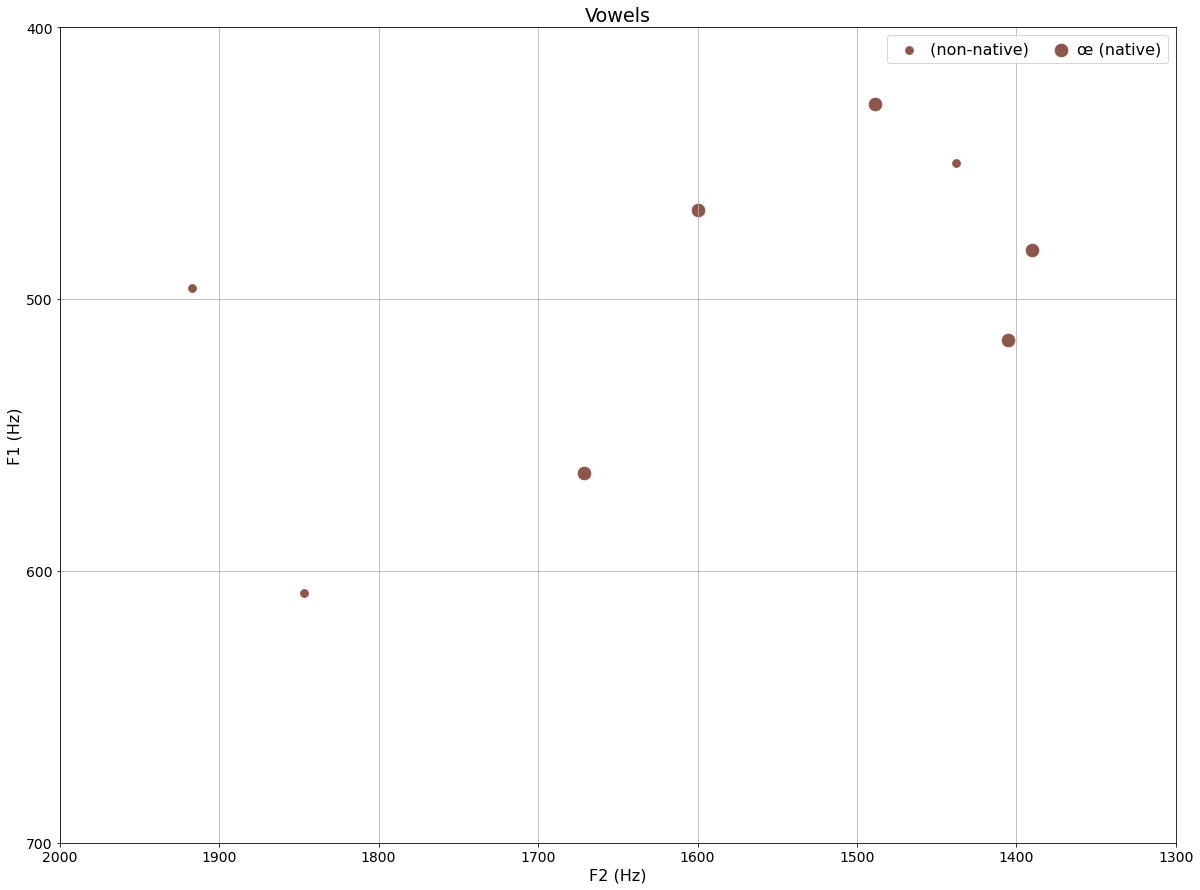

In [10]:
fig, ((ax)) = plt.subplots(1, 1, figsize=(20, 15))
plt.rcParams.update({'font.size': 16})
ax.invert_xaxis()
ax.invert_yaxis()
for data in [non_native, native]:
    isnat = data == native
    f1s = []
    f2s = []
    f3s = []
    labels = []
    for key, val in data.items():
        if key != 'œ':
            continue
        cur_f1s = []
        cur_f2s = []
        cur_f3s = []
        for f1, f2, f3 in val:
            cur_f1s.append(f1)
            cur_f2s.append(f2)
            cur_f3s.append(f3)
        labels.append(key)
        f1s.append(cur_f1s)
        f2s.append(cur_f2s)
        f3s.append(cur_f3s)
    for cur_f1s, cur_f2s, label in zip(f1s, f2s, labels):
        ax.scatter(cur_f2s, cur_f1s, s=160 if isnat else 60, label=label + ' (native)' if isnat else ' (non-native)', color=colors[label])
    ax.set_xticks(np.linspace(1300, 2000, 8))
    ax.set_yticks(np.linspace(400, 700, 4))
    ax.set_xlabel('F2 (Hz)')
    ax.set_ylabel('F1 (Hz)')
    ax.set_title('Non-native' if not isnat else 'Vowels')
    ax.grid(True)
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    ax.legend(loc="upper right", ncol=2, handletextpad=0, columnspacing=1)
plt.savefig('OE.png')

In [5]:
import pandas as pd

df = pd.read_csv('eval.csv', sep='\t')
df

,Recording,Word,Vowel,NN vowel,LG vowel,Proba LG 2,Proba LG 9,Proba LG a,Proba LG e,Proba LG E,...,Proba NN e,Proba NN E,Proba NN i,Proba NN O,Proba NN o,Proba NN u,Proba NN y,Region,Gender,Person ID
0,0,la,a,a,a,0.0000,0.0005,0.9988,0.0000,0.0000,...,0.0000,0.0050,0.0000,0.1000,0.0025,0.0025,0.0000,Bretagne,M,1
1,1,mort,O,o,O,0.0000,0.0101,0.0690,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.5775,0.0225,0.0000,0.0000,Bretagne,M,1
2,2,pu,y,u,y,0.0103,0.0740,0.0007,0.0000,0.0000,...,0.0000,0.0000,0.0125,0.0000,0.0375,0.0250,0.8600,Bretagne,M,1
3,3,loup,u,u,u,0.0001,0.0174,0.0000,0.0000,0.0000,...,0.0025,0.0000,0.0050,0.0025,0.2225,0.5750,0.1775,Bretagne,M,1
4,4,l'air,E,e,E,0.0000,0.0000,0.0000,0.9999,0.0001,...,0.3525,0.3875,0.0000,0.0750,0.0000,0.0000,0.0100,Bretagne,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,5,tôt,o,o,O,0.0000,0.0000,0.0001,0.0000,0.0000,...,0.0025,0.0075,0.0000,0.6525,0.0775,0.0500,0.0000,Ukraine,F,46
896,6,meurt,9,o,O,0.0000,0.0005,0.3806,0.0000,0.0000,...,0.0100,0.0050,0.0000,0.5175,0.0050,0.0025,0.0000,Ukraine,F,46
897,7,se,2,E,a,0.1090,0.2219,0.0145,0.1041,0.3365,...,0.0175,0.0300,0.0000,0.0350,0.0000,0.0000,0.0000,Ukraine,F,46
898,8,mer,E,a,a,0.0000,0.0000,0.9999,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.4200,0.0150,0.0000,0.0000,Ukraine,F,46


In [11]:
print('NN acc:', 100*(df['Vowel'] == df['NN vowel']).sum()/len(df['Vowel']), '%')
print('LG acc:', 100*(df['Vowel'] == df['LG vowel']).sum()/len(df['Vowel']), '%')

NN acc: 51.55555555555556 %
LG acc: 67.88888888888889 %
